<a href="https://colab.research.google.com/github/NIKITOOOK/mlAlgorithms/blob/main/IW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Продвинутый варинат


## Импортируем данные из orders_expanded_df.csv

Требуемые колонки: store_id,	order_price*,	profit, delivery_distance,  planned_prep_time, region_id, items_count, prepared_on_time. Если Выбрали продвинутый вариант, то добавить колонки day_of_the_week, закодированные hour_start, minutes_start.
*order_price – это сумма цен товаров, находящихся в каждом заказе.

In [ ]:
import pandas as pd

orders_expanded_df = pd.read_csv('/content/orders_expanded_df.csv')

orders_expanded_df

,Unnamed: 0,store_id,order_id,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,region_id,status_id,order_assembly,order_assembly_min,order_delay,product_name,items_count,order_price,prepared_on_time
0,0,5014,20562761,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,683,F,0 days 00:06:27,6.450000,8.550000,Nachos,2,30.49,1
1,2,3856,20562753,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,683,F,0 days 00:10:31,10.516667,-0.516667,Soup,2,240.78,1
2,4,10825,20562723,43.6080,459,2024-09-05 15:23:32,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,05-09-2024 16:06:38,683,F,0 days 00:14:54,14.900000,5.100000,Sushi,1,85.99,1
3,5,5640,20562673,32.8640,2611,2024-09-05 15:19,2024-09-05 15:19:05,20.0,2024-09-05 15:35:25,05-09-2024 16:03:25,709,F,0 days 00:16:20,16.333333,3.666667,Burrito,2,24.68,1
4,7,7283,20562665,11.0600,1041,2024-09-05 15:18:39,NaN,15.0,2024-09-05 15:35:33,05-09-2024 16:03:33,707,F,NaN,NaN,NaN,Frittata,1,14.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7820,19984,7557,20535845,50.1650,8046,2024-09-03 15:02:55,2024-09-03 15:03:01,35.0,2024-09-03 15:27:37,03-09-2024 15:55:37,683,F,0 days 00:24:36,24.600000,10.400000,Jambalaya,5,263.85,1
7821,19989,4548,20535841,14.6150,2225,2024-09-03 15:01:55,2024-09-03 15:02:04,20.0,2024-09-03 15:17:18,03-09-2024 15:45:18,707,F,0 days 00:15:14,15.233333,4.766667,Waffle,2,21.05,1
7822,19991,7099,20535837,12.1976,3354,2024-09-03 15:02:21,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,03-09-2024 15:55:40,683,F,0 days 00:25:13,25.216667,-0.216667,Nachos,5,102.11,1
7823,19996,4348,20535835,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,683,F,0 days 00:16:45,16.750000,13.250000,Steak,3,43.43,1


так как это продвинутый вариант, то надо добавить колонки day_of_the_week, закодированные hour_start, minutes_start.

In [ ]:
import numpy
from datetime import datetime, timedelta
# Преобразование колонки 'date_create' в формат datetime
orders_expanded_df['date_create'] = pd.to_datetime(orders_expanded_df['date_create'], errors='coerce')

# Добавление признаков
orders_expanded_df['day_of_the_week'] = orders_expanded_df['date_create'].dt.day_name()
orders_expanded_df['hour_start'] = orders_expanded_df['date_create'].dt.hour
orders_expanded_df['minutes_start'] = orders_expanded_df['date_create'].dt.minute

# Проверка результата
print(orders_expanded_df[['date_create', 'day_of_the_week', 'hour_start', 'minutes_start']].head())


          date_create day_of_the_week  hour_start  minutes_start
0 2024-09-05 15:25:25        Thursday        15.0           25.0
1 2024-09-05 15:25:12        Thursday        15.0           25.0
2 2024-09-05 15:23:32        Thursday        15.0           23.0
3                 NaT             NaN         NaN            NaN
4 2024-09-05 15:18:39        Thursday        15.0           18.0


In [ ]:
orders_expanded_df

,Unnamed: 0,store_id,order_id,profit,delivery_distance,date_create,order_start_prepare,planned_prep_time,order_ready,order_pickup,...,order_assembly,order_assembly_min,order_delay,product_name,items_count,order_price,prepared_on_time,day_of_the_week,hour_start,minutes_start
0,0,5014,20562761,45.5040,2205,2024-09-05 15:25:25,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,05-09-2024 16:00:00,...,0 days 00:06:27,6.450000,8.550000,Nachos,2,30.49,1,Thursday,15.0,25.0
1,2,3856,20562753,30.3360,1368,2024-09-05 15:25:12,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,05-09-2024 16:03:50,...,0 days 00:10:31,10.516667,-0.516667,Soup,2,240.78,1,Thursday,15.0,25.0
2,4,10825,20562723,43.6080,459,2024-09-05 15:23:32,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,05-09-2024 16:06:38,...,0 days 00:14:54,14.900000,5.100000,Sushi,1,85.99,1,Thursday,15.0,23.0
3,5,5640,20562673,32.8640,2611,NaT,2024-09-05 15:19:05,20.0,2024-09-05 15:35:25,05-09-2024 16:03:25,...,0 days 00:16:20,16.333333,3.666667,Burrito,2,24.68,1,NaN,NaN,NaN
4,7,7283,20562665,11.0600,1041,2024-09-05 15:18:39,NaN,15.0,2024-09-05 15:35:33,05-09-2024 16:03:33,...,NaN,NaN,NaN,Frittata,1,14.02,0,Thursday,15.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7820,19984,7557,20535845,50.1650,8046,2024-09-03 15:02:55,2024-09-03 15:03:01,35.0,2024-09-03 15:27:37,03-09-2024 15:55:37,...,0 days 00:24:36,24.600000,10.400000,Jambalaya,5,263.85,1,Tuesday,15.0,2.0
7821,19989,4548,20535841,14.6150,2225,2024-09-03 15:01:55,2024-09-03 15:02:04,20.0,2024-09-03 15:17:18,03-09-2024 15:45:18,...,0 days 00:15:14,15.233333,4.766667,Waffle,2,21.05,1,Tuesday,15.0,1.0
7822,19991,7099,20535837,12.1976,3354,2024-09-03 15:02:21,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,03-09-2024 15:55:40,...,0 days 00:25:13,25.216667,-0.216667,Nachos,5,102.11,1,Tuesday,15.0,2.0
7823,19996,4348,20535835,49.2960,2129,2024-09-03 15:01:24,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,03-09-2024 15:48:34,...,0 days 00:16:45,16.750000,13.250000,Steak,3,43.43,1,Tuesday,15.0,1.0


## (1) Загрузить предобработанные данные из предыдущего домашнего задания. Вынести в отдельный датафрейм признак «order_price» и «order_id».


In [ ]:
orders_price_df = orders_expanded_df[['order_id', 'order_price']].drop_duplicates()
orders_price_df

,order_id,order_price
0,20562761,30.49
1,20562753,240.78
2,20562723,85.99
3,20562673,24.68
4,20562665,14.02
...,...,...
7820,20535845,263.85
7821,20535841,21.05
7822,20535837,102.11
7823,20535835,43.43


## (2)Также из исходного датафрейма вынести в отдельный датафрейм «order_id» и «product_name» (каждому product_id соответствует product_name из products.csv).


In [ ]:
orders_product_name_df = orders_expanded_df[['order_id','product_name']].drop_duplicates()
orders_product_name_df

,order_id,product_name
0,20562761,Nachos
1,20562753,Soup
2,20562723,Sushi
3,20562673,Burrito
4,20562665,Frittata
...,...,...
7820,20535845,Jambalaya
7821,20535841,Waffle
7822,20535837,Nachos
7823,20535835,Steak


##(3) Создать новую колонку «products», в которой находятся названия всех продуктов в рамках одного заказа (order_id). Колонку «product_name» удалить, также удалить дубликаты записей. В полученном датафрейме должно остаться две колонки: order_id и products.


In [ ]:
# Group by 'order_id' and aggregate product names into lists
order_products_grouped = orders_product_name_df.groupby('order_id')['product_name'].apply(list).reset_index()
# переименуем в 'products'
order_products_grouped.rename(columns={'product_name': 'products'}, inplace=True)

order_products_grouped

,order_id,products
0,20535831,[Steak]
1,20535835,[Steak]
2,20535837,[Nachos]
3,20535841,[Waffle]
4,20535845,[Jambalaya]
...,...,...
7820,20562665,[Frittata]
7821,20562673,[Burrito]
7822,20562723,[Sushi]
7823,20562753,[Soup]


## (4)Присоединить на основе order_id признак «order_price». В результирующем датафрейме должно остаться 3 колонки: ID заказа (order_id), перечень всех его продуктов (products) и стоимость заказа (order_price).

In [ ]:
result_df = orders_price_df.merge(order_products_grouped, on=["order_id"])
result_df

,order_id,order_price,products
0,20562761,30.49,[Nachos]
1,20562753,240.78,[Soup]
2,20562723,85.99,[Sushi]
3,20562673,24.68,[Burrito]
4,20562665,14.02,[Frittata]
...,...,...,...
7820,20535845,263.85,[Jambalaya]
7821,20535841,21.05,[Waffle]
7822,20535837,102.11,[Nachos]
7823,20535835,43.43,[Steak]


## (5)С помощью TF-IDF (TfidfVectorizer) создать числовое представление для товаров из колонки «products». Полученную матрицу перевести в датафрейм

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Преобразуем в строку для каждого
result_df['products_str'] = result_df['products'].apply(lambda x: ' '.join(x))

# Инициализация TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit и transform 'products_str' столбец
tfidf_matrix = vectorizer.fit_transform(result_df['products_str'])

# Преобразуем финальную матрицу в dataframe
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print(tfidf_df.head())


   avocado  bagel  banh  bbq  benedict  biscuit  brownie  burger  burrito  \
0      0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0      0.0   
1      0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0      0.0   
2      0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0      0.0   
3      0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0      1.0   
4      0.0    0.0   0.0  0.0       0.0      0.0      0.0     0.0      0.0   

   carrot  ...  sticks  sushi  tacos  tempura  toast  tortilla  waffle  wings  \
0     0.0  ...     0.0    0.0    0.0      0.0    0.0       0.0     0.0    0.0   
1     0.0  ...     0.0    0.0    0.0      0.0    0.0       0.0     0.0    0.0   
2     0.0  ...     0.0    1.0    0.0      0.0    0.0       0.0     0.0    0.0   
3     0.0  ...     0.0    0.0    0.0      0.0    0.0       0.0     0.0    0.0   
4     0.0  ...     0.0    0.0    0.0      0.0    0.0       0.0     0.0    0.0   

   wrap  yogurt  
0   0.0     0.0  
1   0.0     0.

## (6) К полученному выше датафрейму присоединить «order_price». Датафрейм должен содержать признаки после подсчета TF-IDF и цену заказа.

In [ ]:
tfidf_df

,avocado,bagel,banh,bbq,benedict,biscuit,brownie,burger,burrito,carrot,...,sticks,sushi,tacos,tempura,toast,tortilla,waffle,wings,wrap,yogurt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf_df['order_price'] = result_df['order_price'].values
tfidf_df

,avocado,bagel,banh,bbq,benedict,biscuit,brownie,burger,burrito,carrot,...,sushi,tacos,tempura,toast,tortilla,waffle,wings,wrap,yogurt,order_price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.49
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240.78
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.99
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.68
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,263.85
7821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,21.05
7822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.11
7823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.43


## (7) Понизить размерность полученного датафрейма (PCA, t-SNE, UMAP на выбор).

### Понижение размерности с помощью UMAP

In [ ]:
!pip install umap-learn -q

In [ ]:
from umap import UMAP

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


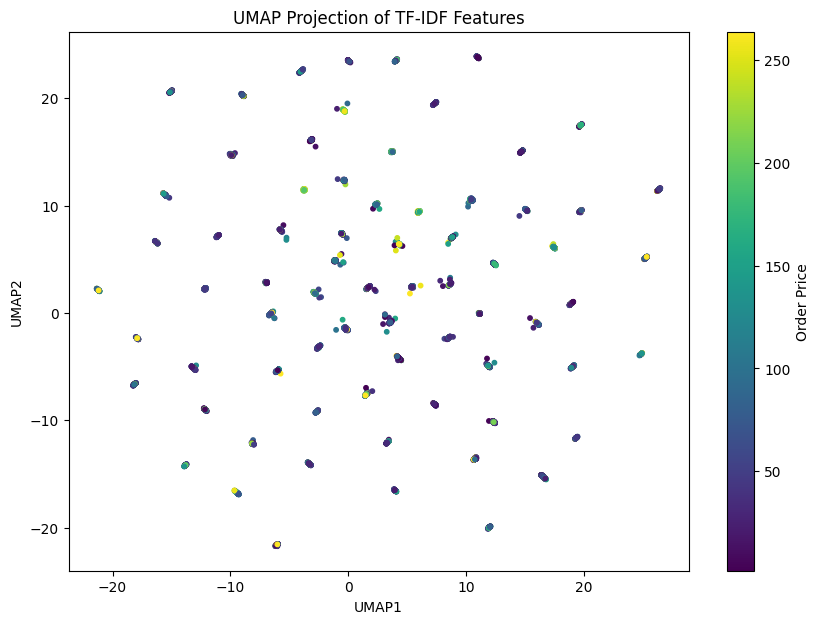

In [ ]:
import umap
import matplotlib.pyplot as plt

# Инициализация UMAP с двумя компонентами
umap_reducer = umap.UMAP(n_components=2, random_state=42)

# Применение UMAP к TF-IDF матрице (без order_price)
reduced_data = umap_reducer.fit_transform(tfidf_df.drop(columns=['order_price']))

# Преобразование результата в датафрейм
reduced_df = pd.DataFrame(reduced_data, columns=['UMAP1', 'UMAP2'])

# Добавление order_price обратно
reduced_df['order_price'] = tfidf_df['order_price'].values

# Визуализация результата
plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced_df['UMAP1'], reduced_df['UMAP2'], c=reduced_df['order_price'], cmap='viridis', s=10)
plt.colorbar(scatter, label='Order Price')
plt.title('UMAP Projection of TF-IDF Features')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()


## (8) Определить начальное количество кластеров по сокращенному датафрейму (TF-IDF-признаки после понижения размерности и order_price). Интерпретировать результат.


In [ ]:
features = reduced_df[['UMAP1', 'UMAP2', 'order_price']]

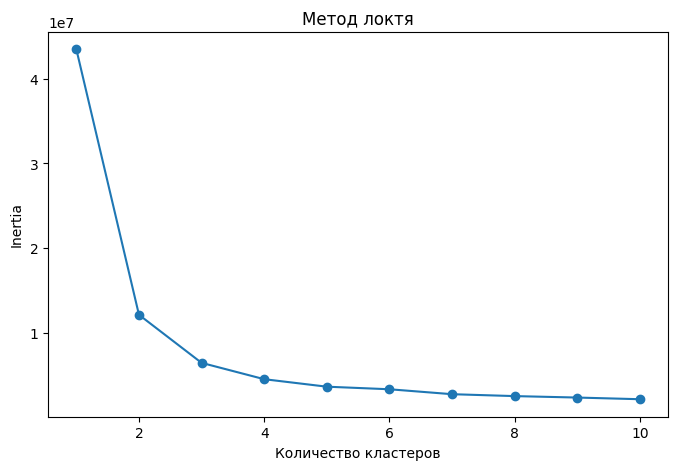

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

# Перебираем количество кластеров
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Построение графика метода локтя
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя')
plt.show()


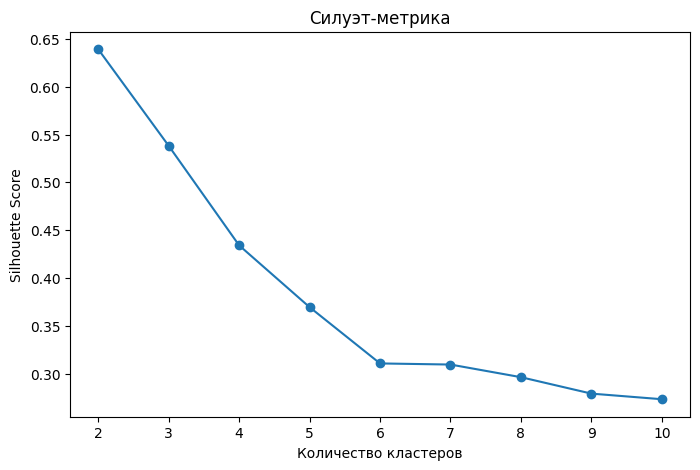

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_scores.append(score)

# Построение графика силуэта
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Силуэт-метрика')
plt.show()


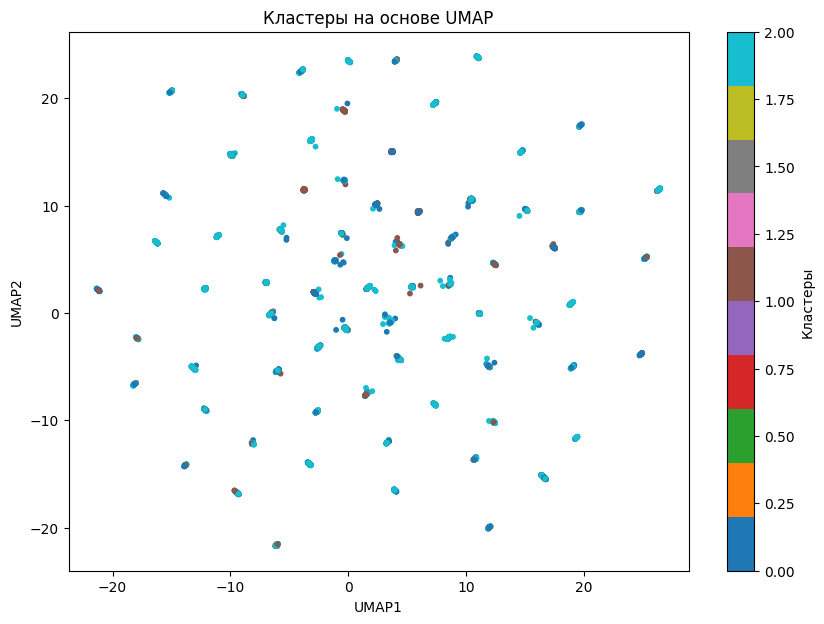

<Figure size 800x500 with 0 Axes>

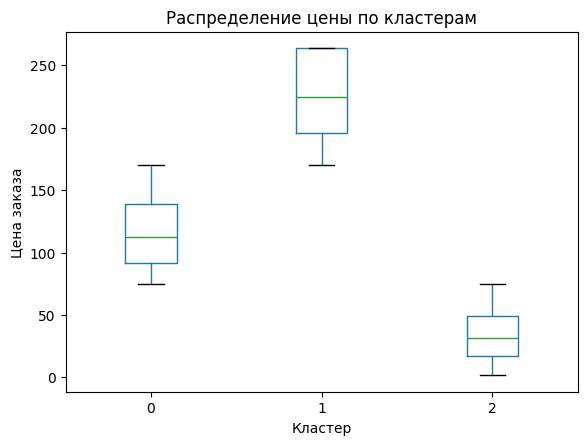

In [ ]:
optimal_k = 3  # замените на оптимальное значение
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
reduced_df['cluster'] = kmeans.fit_predict(features)

# Визуализация UMAP с цветами по кластерам
plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced_df['UMAP1'], reduced_df['UMAP2'], c=reduced_df['cluster'], cmap='tab10', s=10)
plt.colorbar(scatter, label='Кластеры')
plt.title('Кластеры на основе UMAP')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

# Анализ распределения цены
plt.figure(figsize=(8, 5))
reduced_df.boxplot(column='order_price', by='cluster', grid=False)
plt.title('Распределение цены по кластерам')
plt.suptitle('')
plt.xlabel('Кластер')
plt.ylabel('Цена заказа')
plt.show()


## (9) Кластеризовать данные с учетом оптимального числа кластеров. Получить внутренние метрики.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min

# Оптимальное число кластеров (замените на найденное число)
optimal_k = 3

# Кластеризация с использованием KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
reduced_df['cluster'] = kmeans.fit_predict(features)

# Метрика 1: Коэффициент силуэта
silhouette_avg = silhouette_score(features, reduced_df['cluster'])
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Метрика 2: Inertia (внутрикластерное расстояние)
print(f"Inertia: {kmeans.inertia_:.3f}")

# Метрика 3: Среднее расстояние до центров кластеров
_, distances = pairwise_distances_argmin_min(kmeans.cluster_centers_, features)
average_distance_to_centroid = distances.mean()
print(f"Average distance to centroids: {average_distance_to_centroid:.3f}")


Silhouette Score: 0.538
Inertia: 6513947.968
Average distance to centroids: 1.980


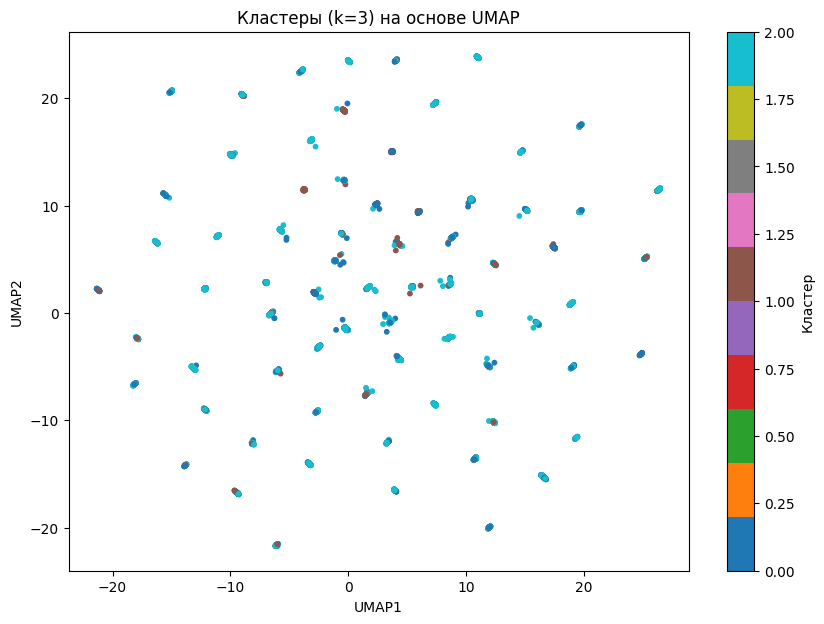

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced_df['UMAP1'], reduced_df['UMAP2'], c=reduced_df['cluster'], cmap='tab10', s=10)
plt.colorbar(scatter, label='Кластер')
plt.title(f'Кластеры (k={optimal_k}) на основе UMAP')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()


<Figure size 800x500 with 0 Axes>

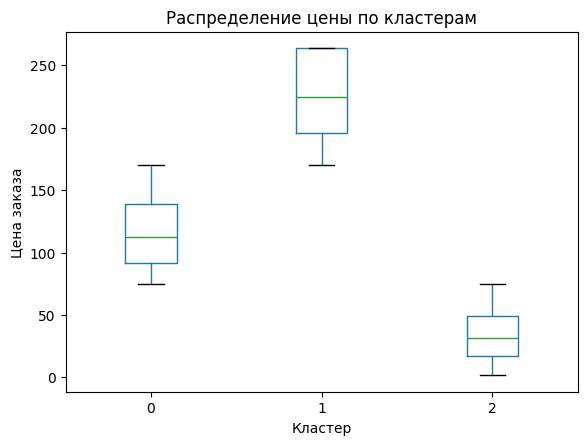

In [ ]:
plt.figure(figsize=(8, 5))
reduced_df.boxplot(column='order_price', by='cluster', grid=False)
plt.title('Распределение цены по кластерам')
plt.suptitle('')
plt.xlabel('Кластер')
plt.ylabel('Цена заказа')
plt.show()


## (10)  Сделать выводы по результатам кластеризации.

Оптимальное число кластеров: Метод локтя и/или коэффициент силуэта позволили определить, что оптимальное число кластеров равно ***3***.
Это количество кластеров подтверждает, что заказы можно разделить на ***3*** групп с разными характеристиками, связанными с продуктами и ценами.

## (11)Оптимальное число кластеров: Метод локтя и/или коэффициент силуэта позволили определить, что оптимальное число кластеров равно k (замените на фактическое значение).
Это количество кластеров подтверждает, что заказы можно разделить на k групп с разными характеристиками, связанными с продуктами и ценами.

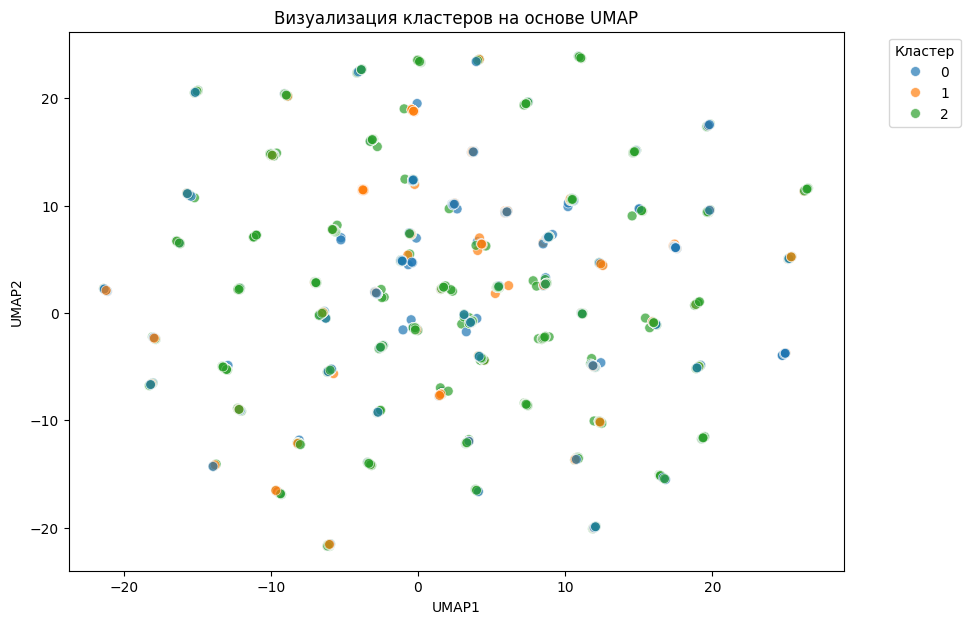

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Цветовая палитра для кластеров
palette = sns.color_palette('tab10', n_colors=reduced_df['cluster'].nunique())

# Визуализация кластеров
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=reduced_df,
    x='UMAP1',
    y='UMAP2',
    hue='cluster',
    palette=palette,
    s=50,
    alpha=0.7
)
plt.title('Визуализация кластеров на основе UMAP')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title='Кластер', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-22-f3ca8319a91e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


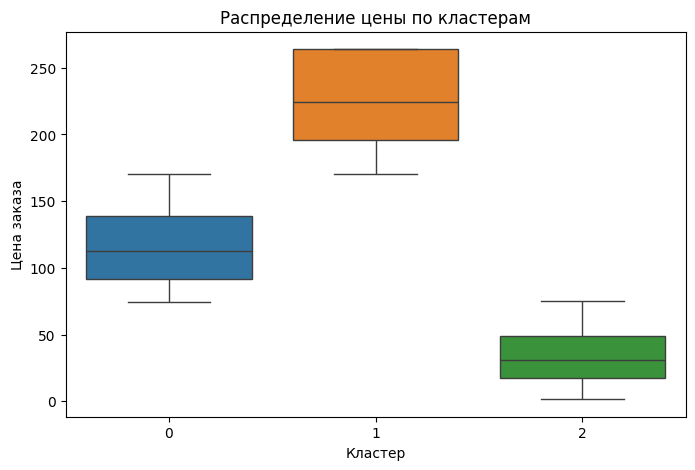

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=reduced_df,
    x='cluster',
    y='order_price',
    palette=palette
)
plt.title('Распределение цены по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Цена заказа')
plt.show()


## (12) Можно создать WordCloud (облако слов) для каждого кластера — визуальное отображение наиболее значимых слов в кластере.


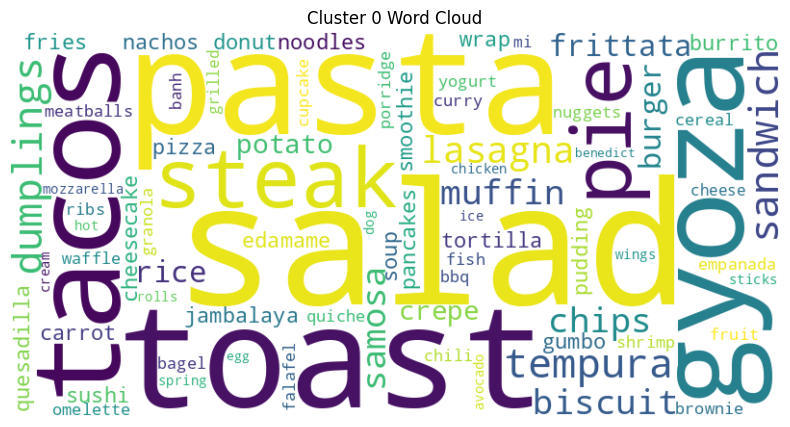

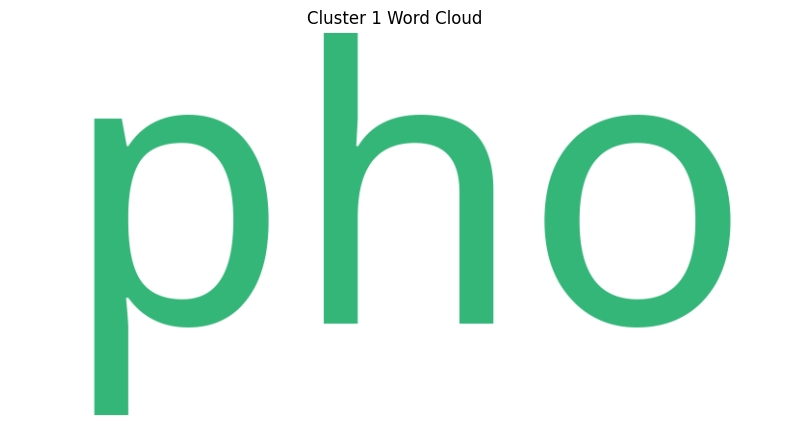

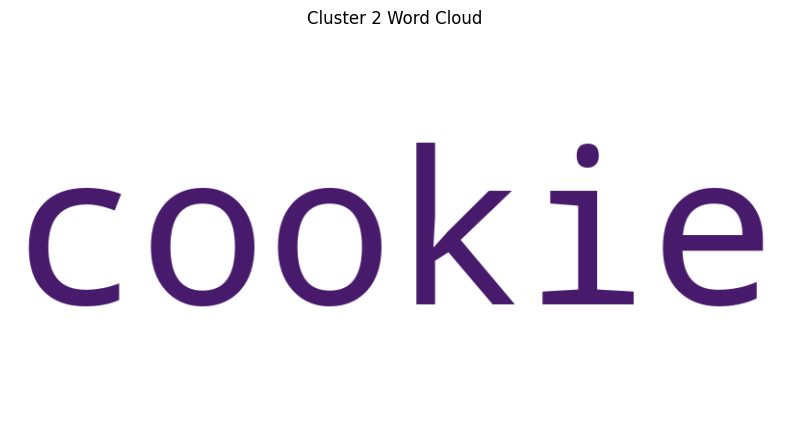

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

orders_expanded_df['product_name'] = orders_expanded_df['product_name'].astype(str)

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(orders_expanded_df['product_name'])

words = tfidf_vectorizer.get_feature_names_out()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_tfidf)

orders_expanded_df['cluster'] = labels

for cluster in np.unique(labels):
    cluster_docs_indices = np.where(labels == cluster)

    tfidf_cluster = X_tfidf[cluster_docs_indices].sum(axis=0)

    tfidf_cluster_dict = {words[i]: tfidf_cluster[0, i] for i in range(tfidf_cluster.shape[1])}


    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_cluster_dict)


    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {cluster} Word Cloud')
    plt.show()
